<a href="https://colab.research.google.com/github/Tomawock/MLDM_COVID-19/blob/master/Correlazione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calcolo e plot della correlazione

### Si calcola la correlazione fra il numero totale di positivi e altri indici.

### Fonte: dati della protezione civile.

N.B.: non ho usato il numero di nuovi positivi perché il dataset non conta le nuove terapie intensive e così via, è solo per essere più svelti. 

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Caricamento dei dati dalla protezione civile, con selezione della sola Lombardia e delle colonne utili.

In [49]:
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-regioni.json'
dataSet = pd.read_json(url)
isLombardia = dataSet["denominazione_regione"]=="Lombardia"
dataSet = dataSet[isLombardia]
dataSet = dataSet.drop(columns=["stato", "codice_regione", "denominazione_regione", "lat", "long", "note", "casi_da_sospetto_diagnostico", "casi_da_screening", "casi_testati"])
dataSet.reset_index(drop=True, inplace=True)
dataSet["index"] = pd.Series(list(range(len(dataSet))))
dataSet.set_index("index")

dataSet

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,index
0,2020-02-24T18:00:00,76,19,95,71,166,0,166,0,6,172,1463,0
1,2020-02-25T18:00:00,79,25,104,127,231,65,68,0,9,240,3700,1
2,2020-02-26T18:00:00,79,25,104,145,249,18,18,0,9,258,3208,2
3,2020-02-27T18:00:00,172,41,213,136,349,100,145,40,14,403,3320,3
4,2020-02-28T18:00:00,235,47,282,192,474,125,128,40,17,531,4835,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2020-07-30T17:00:00,151,13,164,5871,6035,-528,88,73305,16802,96142,1291740,157
158,2020-07-31T17:00:00,148,7,155,5856,6011,-24,77,73402,16806,96219,1300088,158
159,2020-08-01T17:00:00,158,9,167,5788,5955,-56,55,73512,16807,96274,1308507,159
160,2020-08-02T17:00:00,153,9,162,5659,5821,-134,38,73676,16815,96312,1316219,160


Plot dei vari dati con vari colori.

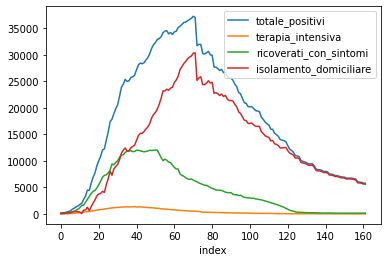

In [56]:
dataSet.plot(x="index", y=["totale_positivi", "terapia_intensiva", "ricoverati_con_sintomi", "isolamento_domiciliare"])
dataSet = dataSet.drop(columns="index")

Calcolo indici di correlazione il risultato è che il numero di positivi rispetto ai ricoveri e al numero di persone in isolamento sono molto correlati. Le terapie intensive sono invece moderatamente correlate, si svolge un test supplementare.

In [67]:
cPositivi_terapie = np.corrcoef(dataSet["totale_positivi"], dataSet["terapia_intensiva"])
cPositivi_ricoveri = np.corrcoef(dataSet["totale_positivi"], dataSet["ricoverati_con_sintomi"])
cPositivi_isolamento = np.corrcoef(dataSet["totale_positivi"], dataSet["isolamento_domiciliare"])

print("Indici di correlazione con il numero di positivi:\nTerapie:\n", cPositivi_terapie, "\n\nRicoveri:\n", cPositivi_ricoveri, "\n\nIsolamento: \n", cPositivi_isolamento)

Indici di correlazione con il numero di positivi:
Terapie:
 [[1.         0.55970671]
 [0.55970671 1.        ]] 

Ricoveri:
 [[1.         0.75876036]
 [0.75876036 1.        ]] 

Isolamento: 
 [[1.         0.92960755]
 [0.92960755 1.        ]]


Si prova a inserire un ritardo alle terapie intensive. 

Ho ipotizzato 20 giorni sottostimando ampiamente il tempo di incubazione + aggravamento dei sintomi.

Il risultato è una correlazione molto forte.

In [87]:
positivi=dataSet["totale_positivi"]
terapie=dataSet["terapia_intensiva"]
delay=20

positivi=positivi[delay:]
terapie=terapie[:len(terapie)-delay]


cPositivi_terapie = np.corrcoef(positivi, terapie)
print("Terapie:\n", cPositivi_terapie)

Terapie:
 [[1.         0.94006176]
 [0.94006176 1.        ]]


### Conclusioni: Inserendo un ritardo fra i 10 e i 35 giorni la correlazione rimane molto rilevante, come c'era da aspettarsi considerando il tempo di incubazione e il tempo necessario affinché si aggravino i sintomi per quanto riguarda le terapie intensive.


N.B.: la correlazione fra i ricoveri e i positivi sembra essere la più debole, pur rimanendo forte, ma va considerato che anche qui sarebbe opportuno inserire un delay, seppure più breve.